In [1]:
#IMPORT LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#MEMBACA DATASET
df = pd.read_csv('dataset/botak.csv')
df.sample(5)

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,botak_prob
859,37.0,Perempuan,Freelance,Tanjung Pinang,1.149414e+07,0,0.0,74.429467,163.222954,Merpati,1,S1,0.104577
2993,32.0,Laki-laki,Pengangguran,Samarinda,1.036097e+07,0,0.0,64.568216,158.553080,Merpati,0,S1,0.603226
6362,31.0,Perempuan,PNS,Mataram,7.544120e+06,0,0.0,65.443921,161.415535,Deadbuoy,1,SMP,0.273410
5402,46.0,Laki-laki,PNS,Bandung,1.038802e+07,0,1.0,62.350468,152.168157,Moonsilk,1,S1,0.772275
2985,41.0,Perempuan,PNS,Jayapura,3.516901e+06,0,1.0,56.120795,160.070399,Shoulder & Head,1,S1,0.690528


In [3]:
#MELIHAT RINGKASAN STATISTIK DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7991 non-null   float64
 1   jenis_kelamin  7982 non-null   object 
 2   pekerjaan      7924 non-null   object 
 3   provinsi       7991 non-null   object 
 4   gaji           7968 non-null   float64
 5   is_menikah     7991 non-null   int64  
 6   is_keturunan   7976 non-null   float64
 7   berat          7952 non-null   float64
 8   tinggi         7991 non-null   float64
 9   sampo          7934 non-null   object 
 10  is_merokok     7991 non-null   int64  
 11  pendidikan     7991 non-null   object 
 12  botak_prob     7991 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 811.7+ KB


In [4]:
#CEK JUMLAH DATA KOSONG
df.isna().sum()

umur              0
jenis_kelamin     9
pekerjaan        67
provinsi          0
gaji             23
is_menikah        0
is_keturunan     15
berat            39
tinggi            0
sampo            57
is_merokok        0
pendidikan        0
botak_prob        0
dtype: int64

In [5]:
#mengisi nilai missing value dengan ketentuan:
#modus untuk data kategorik dan mean untuk data numerik
from statistics import mode

jenis_kelamin_mode = mode(df['jenis_kelamin'])
pekerjaan_mode = mode(df['pekerjaan']) 
is_keturunan_mode = mode(df['is_keturunan']) 
sampo_mode = mode(df['sampo'])
berat_mean = df['berat'].mean() 
gaji_mean = df['gaji'].mean()

kolom_missing = ['jenis_kelamin','pekerjaan',
                 'is_keturunan','berat','sampo','gaji']
inputan = [jenis_kelamin_mode, pekerjaan_mode,
           is_keturunan_mode, berat_mean, sampo_mode, gaji_mean]

for kolom, inputan in zip(kolom_missing, inputan): 
    df[kolom].fillna(inputan, inplace=True) 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7991 non-null   float64
 1   jenis_kelamin  7991 non-null   object 
 2   pekerjaan      7991 non-null   object 
 3   provinsi       7991 non-null   object 
 4   gaji           7991 non-null   float64
 5   is_menikah     7991 non-null   int64  
 6   is_keturunan   7991 non-null   float64
 7   berat          7991 non-null   float64
 8   tinggi         7991 non-null   float64
 9   sampo          7991 non-null   object 
 10  is_merokok     7991 non-null   int64  
 11  pendidikan     7991 non-null   object 
 12  botak_prob     7991 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 811.7+ KB


<ipython-input-7-8c461df20f8e>:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-7-8c461df20f8e>:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-7-8c461df20f8e>:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-7-8c461df20f8e>:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-7-8c461df20f8e>:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-7-8c461df20f8e>:9: UserWarning: Tight layout not applied. tight_layout cannot make axes wi

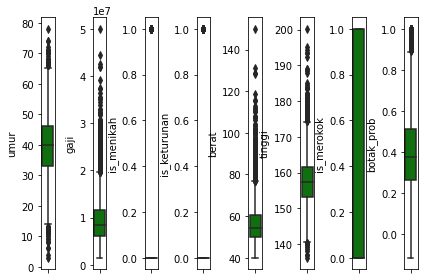

In [7]:
#mengecek outliers
nums  = ['umur', 'gaji', 'is_menikah', 'is_keturunan',
         'berat', 'tinggi', 'is_merokok', 'botak_prob']

features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

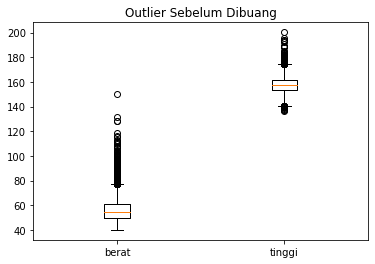

Jumlah Baris dengan outlier : 7991


In [8]:
#mengatasi outlier pada kolom berat dan tinggi
kolom_numerik = ['berat', 'tinggi']
plt.boxplot(df[kolom_numerik])
plt.xticks([1, 2], kolom_numerik)
plt.title('Outlier Sebelum Dibuang')
plt.show() 
print(f'Jumlah Baris dengan outlier : {df.shape[0]}')

In [9]:
# Buang Outlier
# Q1, Q3, dan IQR
Q1 = df[kolom_numerik].quantile(0.25)
Q3 = df[kolom_numerik].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[kolom_numerik] < (Q1 - 1.5 * IQR)) | 
          (df[kolom_numerik] > (Q3 + 1.5 * IQR))).any(axis=1)] 

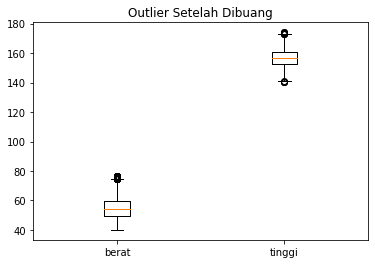

Jumlah Baris Tanpa Outlier : 7637


In [10]:
# Cek Ulang 
plt.boxplot(df[kolom_numerik])
plt.xticks([1, 2], kolom_numerik)
plt.title('Outlier Setelah Dibuang')
plt.show() 
print(f'Jumlah Baris Tanpa Outlier : {df.shape[0]}') 

In [11]:
prob_botak_70 = df[df['botak_prob'] >= 0.7]
prob_botak_70.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 11 to 7990
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           603 non-null    float64
 1   jenis_kelamin  603 non-null    object 
 2   pekerjaan      603 non-null    object 
 3   provinsi       603 non-null    object 
 4   gaji           603 non-null    float64
 5   is_menikah     603 non-null    int64  
 6   is_keturunan   603 non-null    float64
 7   berat          603 non-null    float64
 8   tinggi         603 non-null    float64
 9   sampo          603 non-null    object 
 10  is_merokok     603 non-null    int64  
 11  pendidikan     603 non-null    object 
 12  botak_prob     603 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 66.0+ KB


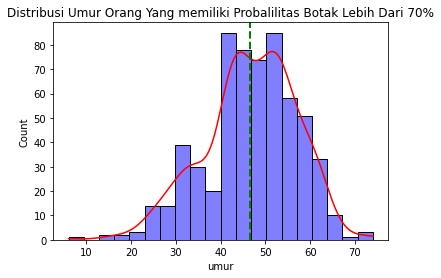

In [12]:
# UMUR 
fig3, axs3 = plt.subplots()
sns.histplot(prob_botak_70, x='umur', bins=20, color='blue', alpha=0.5, kde=True, ax=axs3)
axs3.lines[0].set_color('red') 
axs3.axvline(x=prob_botak_70.umur.mean(), color='green', ls='--', lw=2)
axs3.set_title('Distribusi Umur Orang Yang memiliki Probalilitas Botak Lebih Dari 70%')
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7637 entries, 0 to 7990
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7637 non-null   float64
 1   jenis_kelamin  7637 non-null   object 
 2   pekerjaan      7637 non-null   object 
 3   provinsi       7637 non-null   object 
 4   gaji           7637 non-null   float64
 5   is_menikah     7637 non-null   int64  
 6   is_keturunan   7637 non-null   float64
 7   berat          7637 non-null   float64
 8   tinggi         7637 non-null   float64
 9   sampo          7637 non-null   object 
 10  is_merokok     7637 non-null   int64  
 11  pendidikan     7637 non-null   object 
 12  botak_prob     7637 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 835.3+ KB


In [14]:
cats = ['jenis_kelamin', 'pekerjaan', 'sampo', 'pendidikan']
features = cats
for i in range(0, len(features)):
    print(df[features[i]].unique())

['Laki-laki' 'Perempuan']
['PNS' 'Pegawai swasta' 'Freelance' 'Pengangguran']
['Deadbuoy' 'Moonsilk' 'Merpati' 'Pantone' 'Shoulder & Head']
['S1' 'SMA' 'S2' 'SMP' 'SD' 'S3']


In [15]:
gender_map = ({'Laki-laki' : 1, 
               'Perempuan' : 0})
pekerjaan_map = ({'PNS' : 0, 
                  'Pegawai swasta' : 1, 
                  'Freelance' : 2, 
                  'Pengangguran' : 3})
sampo_map = ({'Deadbuoy' : 0, 
              'Moonsilk' :1, 
              'Merpati' : 2,
              'Pantone' : 3, 
              'Shoulder & Head' : 4}) 
pendidikan_map = ({'SD' : 0, 
                   'SMP' : 1, 
                   'SMA' : 2, 
                   'S1' : 3,
                   'S2': 4, 
                   'S3': 5}) 

my_map = [gender_map,pekerjaan_map,sampo_map,pendidikan_map]

for kolom,my_map in zip(cats, my_map): 
    df[kolom] = df[kolom].map(my_map)

In [16]:
cats = ['jenis_kelamin', 'pekerjaan', 'sampo', 'pendidikan']
features = cats
for i in range(0, len(features)):
    print(df[features[i]].unique())

[1 0]
[0 1 2 3]
[0 1 2 3 4]
[3 2 4 1 0 5]


In [17]:
#MENGATASI NILAI ERROR
df.describe()

,umur,jenis_kelamin,pekerjaan,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,botak_prob
count,7637.000000,7637.000000,7637.000000,7.637000e+03,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000
mean,39.674480,0.667932,0.831871,9.461383e+06,0.031033,0.193924,55.198942,156.987646,2.000524,0.500589,2.645803,0.396499
std,10.032404,0.470986,0.824910,4.793283e+06,0.173419,0.395396,7.266706,5.825779,1.398008,0.500032,0.898233,0.191291
min,3.000000,0.000000,0.000000,1.500000e+06,0.000000,0.000000,40.000000,140.624320,0.000000,0.000000,0.000000,-0.115700
25%,33.000000,0.000000,0.000000,6.109035e+06,0.000000,0.000000,49.767977,152.910890,1.000000,0.000000,2.000000,0.260708
50%,40.000000,1.000000,1.000000,8.426402e+06,0.000000,0.000000,53.917817,156.920384,2.000000,1.000000,3.000000,0.373199
75%,47.000000,1.000000,1.000000,1.152087e+07,0.000000,0.000000,59.601606,160.962342,3.000000,1.000000,3.000000,0.512380
max,78.000000,1.000000,3.000000,5.000000e+07,1.000000,1.000000,76.813519,174.166621,4.000000,1.000000,5.000000,1.000000


In [18]:
#melihat jumlah data yang memiliki nilai botal_prob negatif
print('jumlah data yang tidak sesuai (bernilai negatif):',
      df[df['botak_prob']<0].shape[0])

df.loc[df['botak_prob'] <0,'botak_prob'] = df['botak_prob'].mean()

jumlah data yang tidak sesuai (bernilai negatif): 35


In [19]:
df['botak_prob'].describe()

count    7637.000000
mean        0.398477
std         0.189025
min         0.002085
25%         0.262805
50%         0.375437
75%         0.512380
max         1.000000
Name: botak_prob, dtype: float64

# REGRESI LINIER SEDERHANA

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7637 entries, 0 to 7990
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7637 non-null   float64
 1   jenis_kelamin  7637 non-null   int64  
 2   pekerjaan      7637 non-null   int64  
 3   provinsi       7637 non-null   object 
 4   gaji           7637 non-null   float64
 5   is_menikah     7637 non-null   int64  
 6   is_keturunan   7637 non-null   float64
 7   berat          7637 non-null   float64
 8   tinggi         7637 non-null   float64
 9   sampo          7637 non-null   int64  
 10  is_merokok     7637 non-null   int64  
 11  pendidikan     7637 non-null   int64  
 12  botak_prob     7637 non-null   float64
dtypes: float64(6), int64(6), object(1)
memory usage: 835.3+ KB


In [21]:
df.describe()

,umur,jenis_kelamin,pekerjaan,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,botak_prob
count,7637.000000,7637.000000,7637.000000,7.637000e+03,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000
mean,39.674480,0.667932,0.831871,9.461383e+06,0.031033,0.193924,55.198942,156.987646,2.000524,0.500589,2.645803,0.398477
std,10.032404,0.470986,0.824910,4.793283e+06,0.173419,0.395396,7.266706,5.825779,1.398008,0.500032,0.898233,0.189025
min,3.000000,0.000000,0.000000,1.500000e+06,0.000000,0.000000,40.000000,140.624320,0.000000,0.000000,0.000000,0.002085
25%,33.000000,0.000000,0.000000,6.109035e+06,0.000000,0.000000,49.767977,152.910890,1.000000,0.000000,2.000000,0.262805
50%,40.000000,1.000000,1.000000,8.426402e+06,0.000000,0.000000,53.917817,156.920384,2.000000,1.000000,3.000000,0.375437
75%,47.000000,1.000000,1.000000,1.152087e+07,0.000000,0.000000,59.601606,160.962342,3.000000,1.000000,3.000000,0.512380
max,78.000000,1.000000,3.000000,5.000000e+07,1.000000,1.000000,76.813519,174.166621,4.000000,1.000000,5.000000,1.000000


In [22]:
#Bagi data ke features dan label 
#kolom gaji dan provinsi tidak dibutuhkan
X = df[['umur','jenis_kelamin',
        'pekerjaan','is_menikah',
        'is_keturunan','berat',
        'tinggi','sampo',
        'is_merokok','pendidikan']] #Kolom Features
y = df['botak_prob'] #Kolom class/label

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25)

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('MSE: ',mse)

rmse = np.sqrt(mse)
print('RMSE: ',rmse)

MSE:  0.011998443738242352
RMSE:  0.10953740794012953


In [27]:
from sklearn.metrics import r2_score
r2_squared = r2_score(y_test, y_pred)
r2_squared

0.6494862935547299

In [26]:
#SIMPAN MODEL YANG SUDAH DIBUAT
import pickle

pickle.dump(model, open('regresi_kebotakan.pkl','wb'))